<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/deep-learning/Assignments/Student-Assignments/MTech-DS-DL-Akshada%20Gaonkar-D006/Assignment%203/DL_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data: https://public.roboflow.com/classification/rock-paper-scissors-(small)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!ls "/content/drive/MyDrive/Datasets"

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/Rock Paper Scissors.v1-raw-300x300.folder.zip"

## Importing Libraries 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pandas as pd
import random
from random import sample
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score, classification_report

## Loading the dataset

In [ ]:
train_dir = "/content/train/"
test_dir = "/content/test/"
valid_dir = "/content/valid/"

In [ ]:
paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scissors_dir = os.path.join(train_dir, 'scissors')

paper_imgs = os.listdir(paper_dir)
rock_imgs = os.listdir(rock_dir)
scissors_imgs = os.listdir(scissors_dir)

In [ ]:
len(paper_imgs), len(rock_imgs), len(scissors_imgs) 

(840, 840, 840)

## Visualizing training images for 3 categories - Rock, Paper, Scissors 

Training images for PAPER


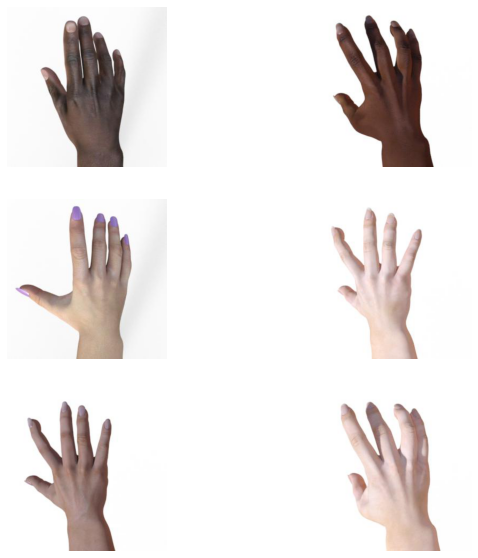

In [ ]:
sample_paper = random.sample(os.listdir(train_dir + "paper"), 6)

print("Training images for PAPER")
plt.figure(figsize=(10,10))
for i, sp in enumerate(sample_paper):
  plt.subplot(3, 2, i+1)
  img = mpimg.imread(train_dir + "paper/" + sp)
  plt.imshow(img)
  plt.axis("off")

Training images for ROCK


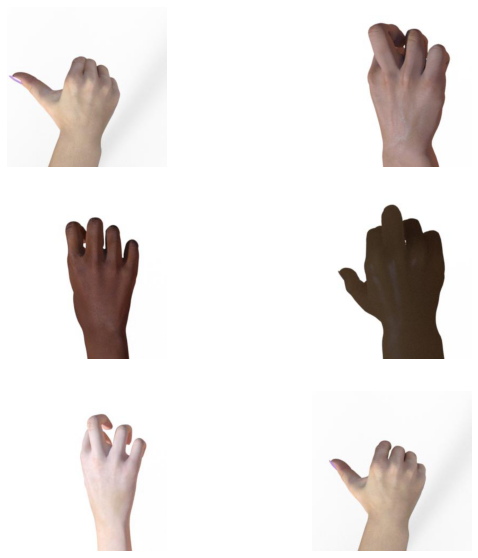

In [ ]:
sample = random.sample(os.listdir(train_dir + "rock"), 6)

print("Training images for ROCK")
plt.figure(figsize=(10,10))
for i, s in enumerate(sample):
  plt.subplot(3, 2, i+1)
  img = mpimg.imread(train_dir + "rock/" + s)
  plt.imshow(img)
  plt.axis("off")

Training images for SCISSORS


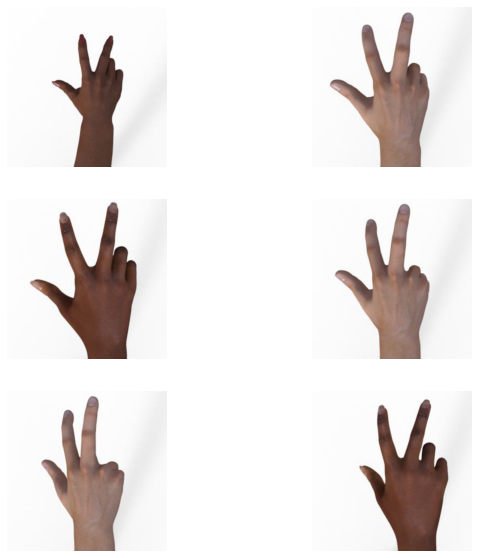

In [ ]:
sample = random.sample(os.listdir(train_dir + "scissors"), 6)

print("Training images for SCISSORS")
plt.figure(figsize=(10,10))
for i, s in enumerate(sample):
  plt.subplot(3, 2, i+1)
  img = mpimg.imread(train_dir + "scissors/" + s)
  plt.imshow(img)
  plt.axis("off")

## Image Augmentation 

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, 
#     height_shift_range=0.2,
      shear_range=0.2,       
      zoom_range=0.2,        
      horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    shuffle=True,
    class_mode = 'categorical'
    )

Found 2520 images belonging to 3 classes.


Augmented training images


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


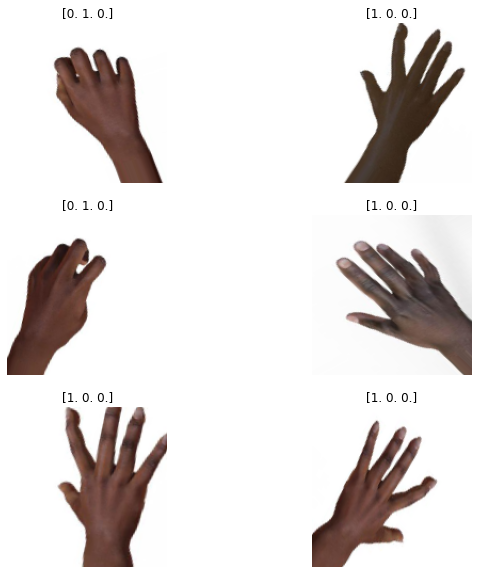

In [ ]:
imgs, labels = next(train_generator)

print("Augmented training images")
plt.figure(figsize=(10,10))
for i in range(6):
  plt.subplot(3, 2, i+1)
  plt.imshow(imgs[i])
  plt.axis("off")
  plt.title(labels[i])
plt.show()

In [ ]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    class_mode = 'categorical', 
    shuffle = True
    )

Found 372 images belonging to 3 classes.


## Building a CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

**callback function**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.80):
            print("\nReached 80% accuracy -> training stopped")
            self.model.stop_training = True
        
callbacks = myCallback()

## Model Performance

In [ ]:
history = model.fit(
      train_generator,
      epochs = 10,
      validation_data=validation_generator,
      callbacks=[callbacks])

Epoch 1/10
79/79 [==============================] - 31s 347ms/step - loss: 1.9531 - accuracy: 0.5528 - val_loss: 0.7745 - val_accuracy: 0.6586
Epoch 2/10
79/79 [==============================] - 17s 209ms/step - loss: 0.5053 - accuracy: 0.7853 - val_loss: 0.2193 - val_accuracy: 0.9247
Epoch 3/10
79/79 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8516
Reached 80% accuracy -> training stopped
79/79 [==============================] - 16s 206ms/step - loss: 0.3844 - accuracy: 0.8516 - val_loss: 0.2046 - val_accuracy: 0.9274


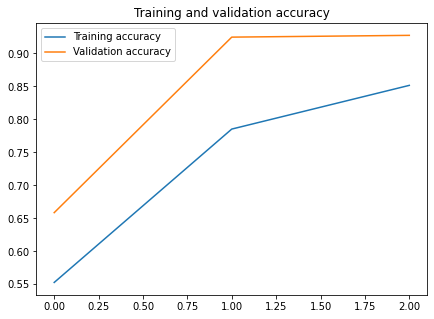

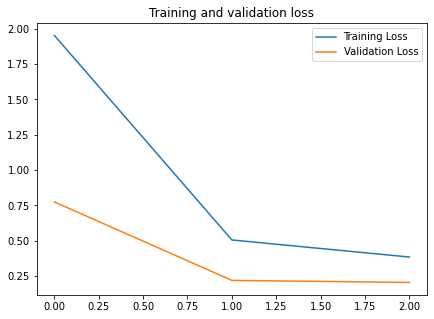

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
labels = dict((v,k) for k,v in train_generator.class_indices.items())

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    class_mode = 'categorical',
    target_size = (150, 150),
)

Found 33 images belonging to 3 classes.


In [ ]:
prob = model.predict(test_generator)
pred = np.argmax(prob, axis=1)

In [ ]:
print(confusion_matrix(test_generator.classes, pred))

[[4 4 3]
 [7 4 0]
 [2 3 6]]


In [ ]:
print(classification_report(test_generator.classes, pred, target_names=labels.values()))

              precision    recall  f1-score   support

       paper       0.31      0.36      0.33        11
        rock       0.36      0.36      0.36        11
    scissors       0.67      0.55      0.60        11

    accuracy                           0.42        33
   macro avg       0.45      0.42      0.43        33
weighted avg       0.45      0.42      0.43        33



In [ ]:
print("F-1 Score=", np.round(f1_score(test_generator.classes, pred, average='weighted'), 3))

F-1 Score= 0.432


In [ ]:
pred_labels = [] 
actuals = []
pred = np.argmax(model.predict(test_generator), axis=1)
for i in range(33):
    pred_labels.append(labels[pred[i]])
    actuals.append(labels[test_generator.classes[i]])

In [ ]:
test_df = pd.DataFrame(columns=['file', 'pred_labels', 'actuals'])
test_df['file'] = test_generator.filenames
test_df['pred_labels'] = pred_labels
test_df['actuals'] = actuals
test_df.head()

,file,pred_labels,actuals
0,paper/paper-hires1_png.rf.bf14bb5fd86e4d28a008...,paper,paper
1,paper/paper-hires2_png.rf.ce27ea20e90f7997bfde...,rock,paper
2,paper/paper1_png.rf.6771d0803db4a4cb6e5e96339f...,paper,paper
3,paper/paper2_png.rf.e48a2c38ee5c364493b26144d0...,scissors,paper
4,paper/paper3_png.rf.ddb6b703174cca92ceca42e995...,rock,paper


In [ ]:
sample = pd.DataFrame(test_df.sample(10))

## Visualizing predictions

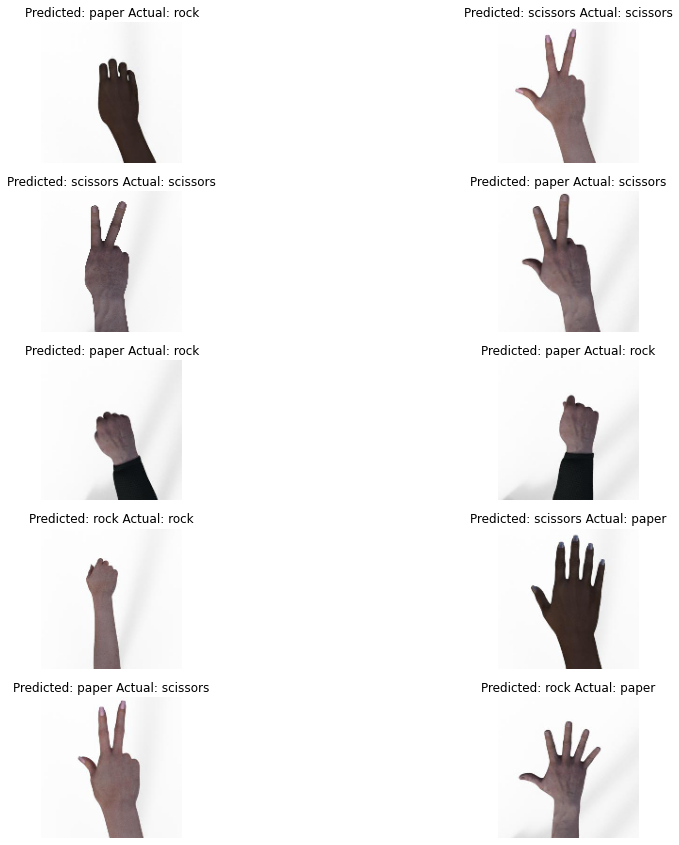

In [ ]:
j=1
plt.figure(figsize=(15,15))
for i in sample.index:

  plt.subplot(5, 2, j)
  img = tf.keras.preprocessing.image.load_img(test_dir + sample['file'][i], target_size = (150, 150))
  plt.imshow(img)
  plt.axis("off")
  plt.title("Predicted: " + test_df['pred_labels'][i] + " Actual: " + test_df['actuals'][i])
  j+=1

## Visualizing Filters in the CNN

conv2d 32
32


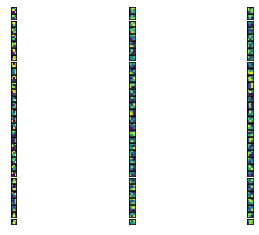

conv2d_1 64
64


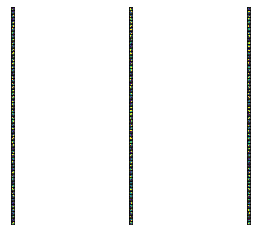

In [ ]:
#Iterate through all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, layer.filters)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

## Visualizing Feature maps

In [ ]:
def viz(img_path):
    
  successive_outputs = [layer.output for layer in model.layers[1:]]

  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
  x   = tf.keras.preprocessing.image.img_to_array(img)                           
  x   = x.reshape((1,) + x.shape)
  x /= 255.0

  successive_feature_maps = visualization_model.predict(x)

  layer_names = [layer.name for layer in model.layers]
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
      
      # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
    
      n_features = feature_map.shape[-1]  # number of features in the feature map
      size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
      
      # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
      
      # Postprocess the feature to be visually palatable
      for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
      
        # Tile each filter into a horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
      
      # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 82944)
(1, 512)
(1, 512)
(1, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


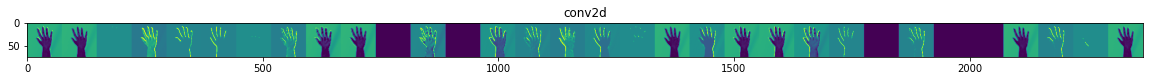

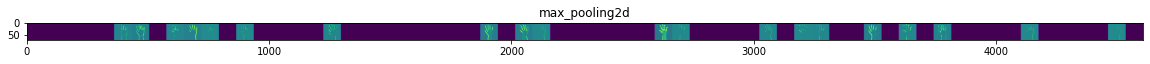

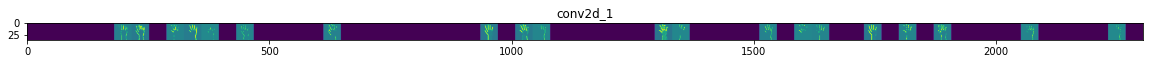

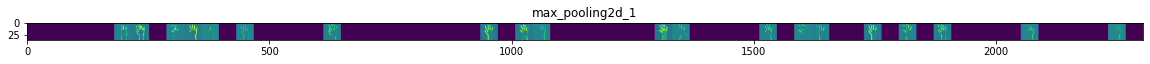

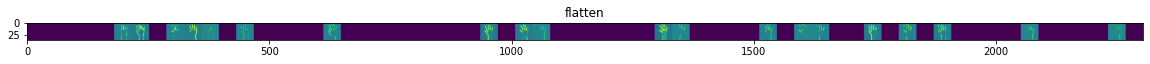

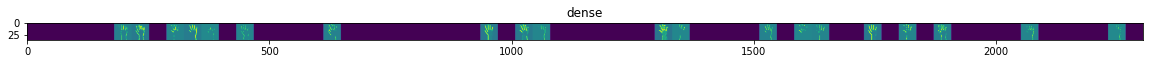

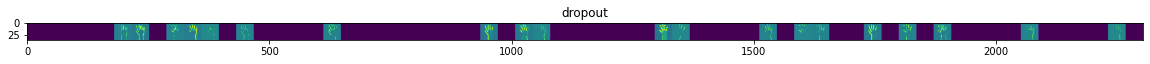

In [ ]:
viz(paper_dir + "/" + paper_imgs[50])

(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 82944)
(1, 512)
(1, 512)
(1, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


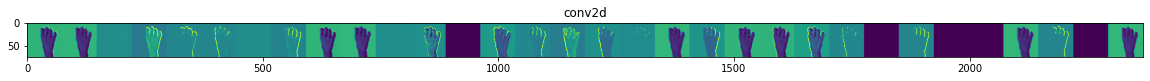

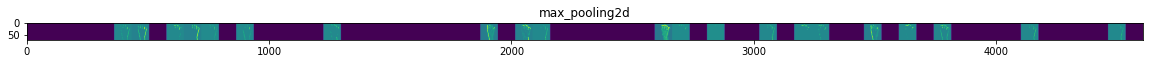

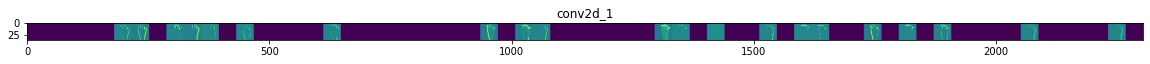

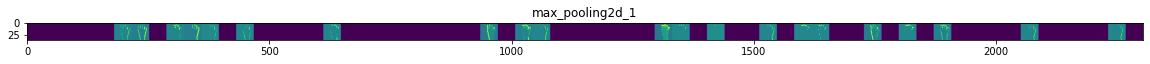

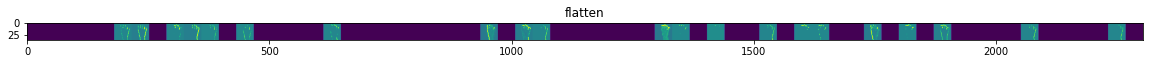

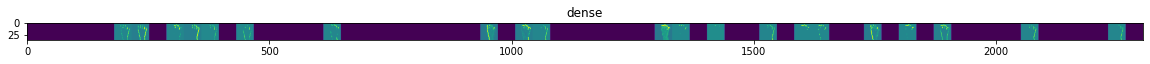

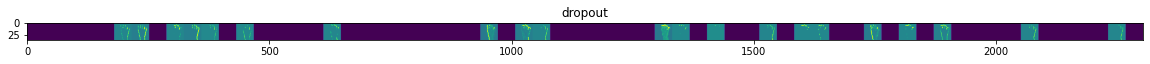

In [ ]:
viz(rock_dir + "/" + rock_imgs[11])

(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 82944)
(1, 512)
(1, 512)
(1, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


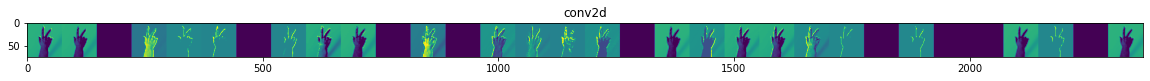

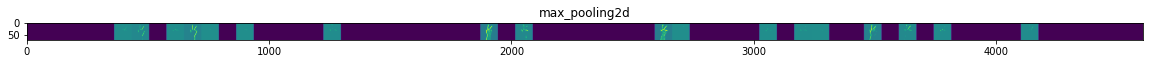

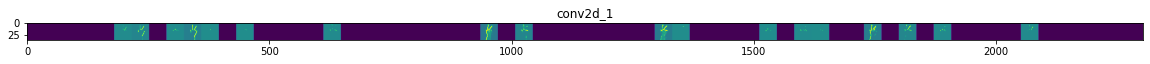

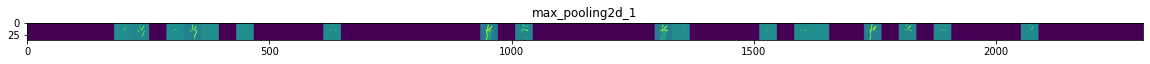

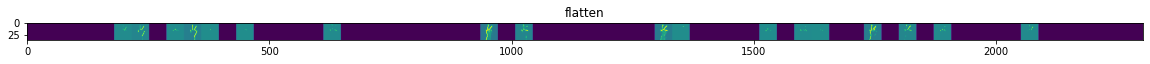

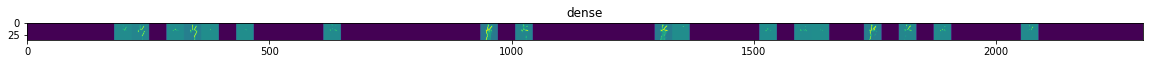

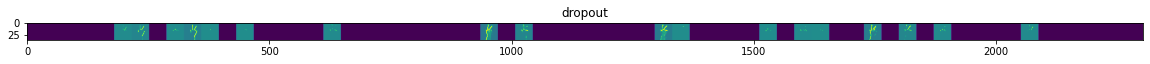

In [ ]:
viz(scissors_dir + "/" + scissors_imgs[50])